# Análisis espectral de EEG
**Materias relacionadas** : Instrumentación Biomédica, Electrofisiología, Temas Selectos en Biomatemáticas y Temas Selectos en Biofísica.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
import wave
import os.path as os
from scipy.fftpack import fft, ifft
from scipy.signal import filtfilt, butter
from scipy.integrate import simpson #Usando la regla de Simpson para calcular el área bajo la curva

In [2]:
carpeta = os.abspath('/Users/yann/Documents/Datos/EEG/') #localización del 
#archivo en tu computadora
datos = pd.read_csv(carpeta +'/H24_OC_OA.csv') #creación de un dataframe
#al que únicamente debes modificar el nombre del archivo con su extensión
datos #comando para presentar el dataframe

,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,EEG.O2,EEG.P8,EEG.T8,EEG.FC6,EEG.F4,EEG.F8,EEG.AF4
0,4339.49,4521.03,4187.69,4627.69,4339.49,4112.31,4348.72,4252.31,4932.82,4447.69,4475.38,4738.46,4420.51,4598.46
1,4346.67,4527.18,4202.05,4633.85,4342.05,4122.05,4366.67,4267.69,4949.74,4465.64,4485.64,4749.74,4432.82,4611.28
2,4350.26,4540.00,4207.18,4643.08,4341.54,4122.05,4374.87,4271.28,4954.36,4462.56,4485.13,4747.18,4430.77,4612.31
3,4337.95,4530.77,4198.46,4638.46,4336.92,4118.97,4372.31,4258.97,4936.92,4441.03,4472.31,4734.87,4413.85,4598.46
4,4334.87,4519.49,4189.23,4629.23,4342.05,4118.97,4369.74,4245.64,4923.08,4436.41,4471.28,4731.79,4416.41,4596.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23122,4414.87,4522.05,4201.54,4683.08,4384.62,4105.64,4361.54,4217.44,4892.82,4362.05,4493.85,4757.44,4426.67,4627.18
23123,4413.85,4524.10,4200.51,4685.64,4388.72,4106.15,4349.74,4196.92,4875.90,4346.67,4476.92,4749.74,4412.82,4614.36
23124,4416.41,4523.08,4204.62,4690.26,4391.28,4102.05,4337.44,4183.59,4875.90,4349.74,4477.95,4752.82,4412.31,4616.41
23125,4413.85,4520.51,4205.13,4687.69,4383.08,4094.36,4336.41,4183.59,4875.90,4352.31,4485.64,4753.33,4413.33,4617.95


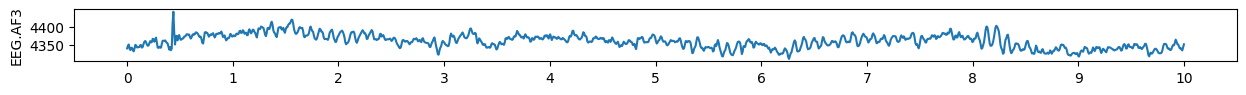

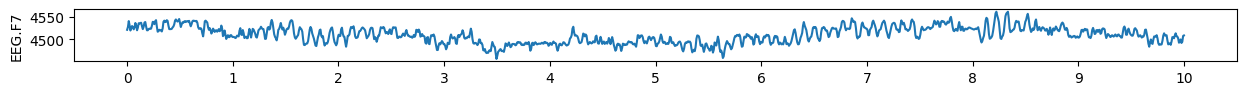

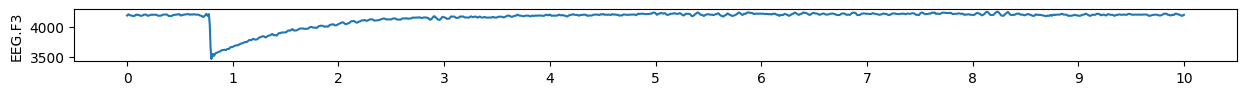

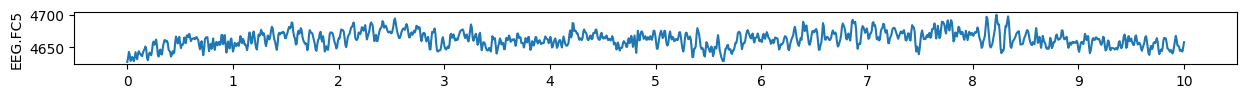

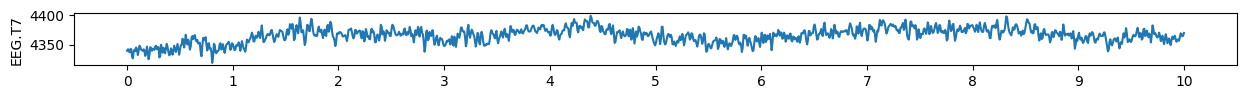

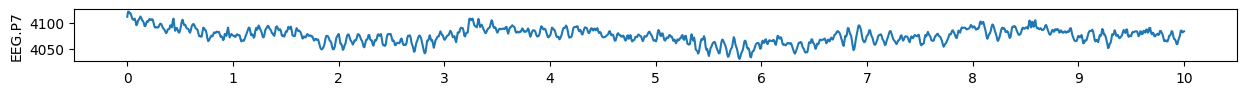

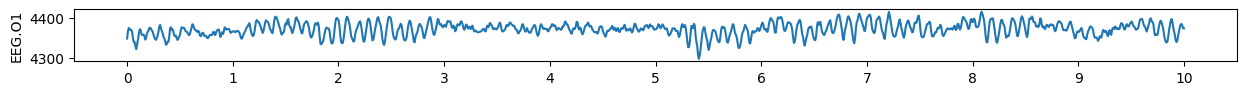

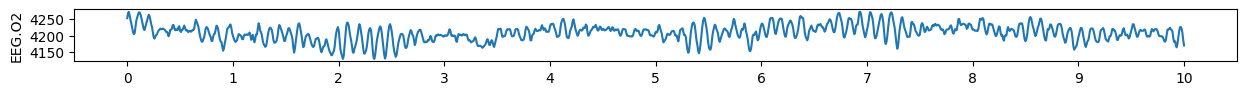

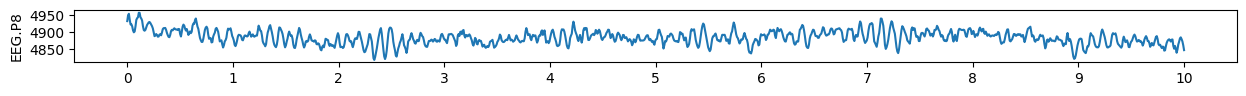

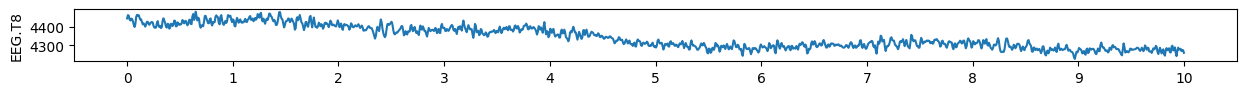

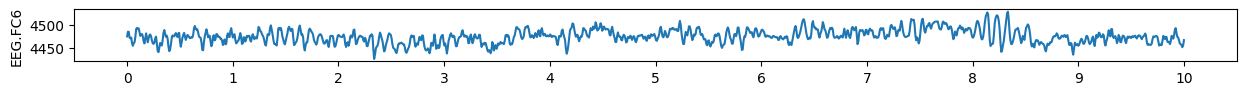

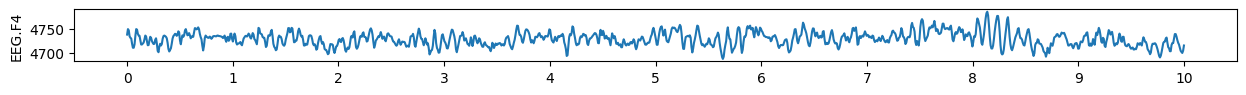

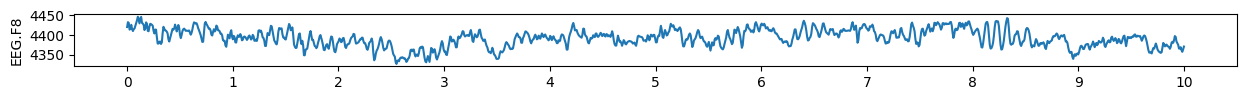

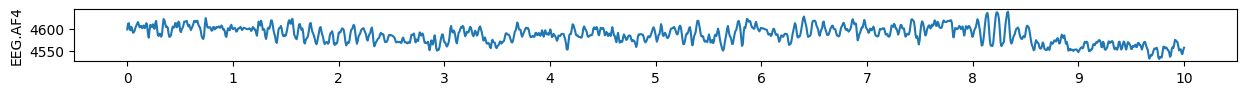

In [3]:
fm_sf=128 #frecuencia de muestreo
ti_sf=0 #tiempo de inicio, debe ser número entero
tf_sf=10#tiempo final, debe ser número entero
pt=(tf_sf-ti_sf)*fm_sf#numero de puntos
t1=ti_sf*fm_sf #nos ayuda a dar la posición de la fila para el tiempo inicial
t2=tf_sf*fm_sf #nos ayuda a dar la posición de la fila para el tiempo final
nombres=list(datos) #almacena los nombres de los encabezados en una lista
t=np.linspace(ti_sf,tf_sf,pt)
escala=1
rg=int(tf_sf/escala)
for i in range (0,14):
    plt.figure(figsize=(15,12))
    plt.subplot(15,1,i+1) #(filas, columnas, i)
    plt.xticks([escala*j for j in range(rg+1)])
    plt.plot(t,np.array(datos)[t1:t2,i]) #t tiempo, i posición
    plt.ylabel(nombres[i])#itera sobre el nombre de las columnas para dar título a los gráficos
    plt.show()

In [4]:
fm=128 #frecuencia de muestreo
ti=0 #tiempo de inicio, debe ser número entero
tf=180 #tiempo final, debe ser número entero
pt=(tf-ti)*fm#numero de puntos
t1=ti*fm #nos ayuda a dar la posición de la fila para el tiempo inicial
t2=tf*fm #nos ayuda a dar la posición de la fila para el tiempo final
nombres=list(datos) #almacena los nombres de los encabezados en una lista
t=np.linspace(ti,tf,pt) 
aaa=[]
for i in range (0,14):
    al=np.array(datos)[t1:t2,i]
    nyq = 128*0.5 #frecuencia de muestreo y ripple
    low = 2 / nyq #bandwith inferior
    high = 45 / nyq #bandwith superior
    b, a = butter(5, [low, high], btype='band')
    env = filtfilt(b, a, al)
    aaa.append(env)
tmp=pd.DataFrame(aaa, nombres)
datosfilt=tmp.transpose()
datosfilt

,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,EEG.O2,EEG.P8,EEG.T8,EEG.FC6,EEG.F4,EEG.F8,EEG.AF4
0,-0.661021,-0.573951,-7.461084,-0.733479,-0.537200,-0.201892,0.129394,1.574238,0.370044,0.689013,-0.048961,-0.249294,-0.687617,-0.371391
1,7.133721,6.406329,6.745429,5.267759,2.669582,10.104725,17.506465,18.219829,18.375933,20.282426,11.215436,12.255393,12.640057,13.043478
2,7.499415,15.823866,10.854421,12.350395,0.655425,10.232674,25.162148,21.553444,22.251940,17.052776,8.764815,9.202542,7.174566,11.854657
3,-2.583810,8.744230,2.322482,8.192437,-2.520840,8.249315,22.367531,11.142803,6.296778,-2.367235,-2.250903,-1.239385,-7.458513,-0.667066
4,-7.484209,-3.569430,-7.057201,-2.028795,1.993742,7.993675,18.578011,-1.974151,-7.037154,-6.197838,-3.379987,-4.000839,-5.457122,-3.043784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23035,7.314812,17.602848,-0.881165,8.017470,15.034431,12.347461,16.934803,14.954764,11.539598,9.947289,3.620773,-6.063129,8.943039,5.706265
23036,5.511773,13.301277,-7.737816,4.066023,6.905559,4.602137,7.723586,1.058057,-0.280781,-6.229463,-12.692491,-12.426261,-3.173012,-3.698940
23037,5.512127,4.065826,0.161710,5.506204,-0.947720,-2.055177,-2.794963,-6.684628,-2.722606,-3.909905,-13.120636,-6.433681,-7.069295,-3.028741
23038,2.838473,-0.540851,6.997377,5.193751,-2.261736,-2.603656,-4.308838,-6.079546,-0.592776,4.804424,-3.732233,-0.887318,-4.486352,-1.095086


Jugar con ventanas

Ver cómo poner una ventana Bartlett para STFT y espectrograma

* ventana estrecha: mejor resolución en tiempo pero no en frecuencia.
* ventana ancha: buena resolución de frecuencia pero no de tiempo.

## Qué necesitas del notebook anterior

* Vincular PSD con Fourier


## ¿Qué representa la PSD?

La PSD nos indica cómo se distribuye la potencia o energía total de una señal a lo largo de diferentes frecuencias. En otras palabras, revela la cantidad de potencia o energía que la señal posee en cada banda de frecuencia específica.

## ¿Cómo se calcula PSD?


## ¿Cómo se visualiza la PSD?

La PSD se representa gráficamente como una curva que muestra la potencia o energía en función de la frecuencia. La altura de la curva en cada punto de frecuencia indica la cantidad de potencia o energía presente en esa frecuencia específica.

## Periodograma de Welch 


El periodograma de Welch es un método para estimar la densidad espectral de potencia (PSD) de una señal de electroencefalografía (EEG). Es una técnica robusta y versátil que se utiliza ampliamente en el análisis de EEG para:

* Visualizar la actividad cerebral en el dominio de la frecuencia.
* Estudiar la dinámica de la actividad cerebral.

### ¿Cómo funciona? 
El periodograma de Welch divide la señal de EEG en segmentos de ventana superpuestos. Luego, se calcula la transformada de Fourier de cada segmento y se promedian los periodogramas de los segmentos. Este proceso reduce la varianza de la estimación espectral y mejora la precisión de la PSD.

### Ventajas

* Robustez y versatilidad.
* Buena precisión en la estimación de la PSD.
* Permite la visualización y el análisis de la actividad cerebral en el dominio de la frecuencia.

### Desventajas
* Pérdida de resolución temporal debido a la superposición de las ventanas.
* Sensibilidad a la elección de la longitud de la ventana y la cantidad de superposición.


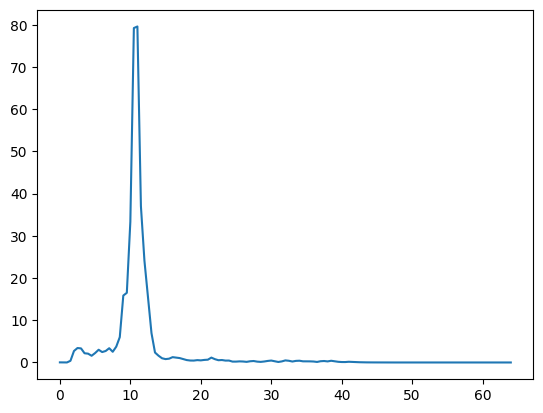

In [5]:
#Brindando las condiciones para obtener un PSD sobre un conjunto de datos
fm=128 #frecuencia de muestreo
ti_a=123 #tiempo de inicio, debe ser número entero
tf_a=133 #tiempo final, debe ser número entero
pt=(tf_a-ti_a)*fm#numero de puntos
t1_a=ti_a*fm #nos ayuda a dar la posición de la fila para el tiempo inicial
t2_a=tf_a*fm
win = 2* fm
chan=6
freqs, psd_a = signal.welch(np.array(datosfilt)[t1_a:t2_a,chan], fm, nperseg=win)
plt.plot(freqs, psd_a)

Etiquetar

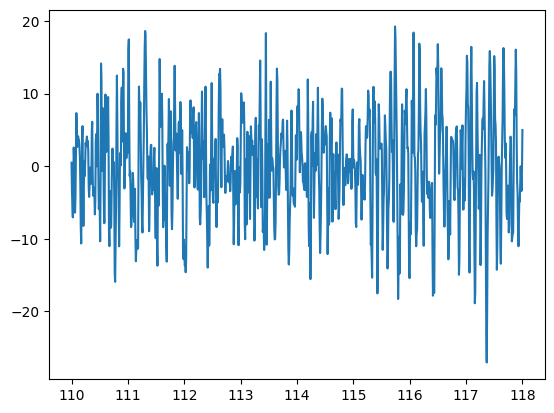

In [9]:
#Generando las condiciones que necesitamos para las gráficas de voltaje
fm=128 #frecuencia de muestreo
ti_a=110 #tiempo de inicio, debe ser número entero
tf_a=118 #tiempo final, debe ser número entero
pt=(tf_a-ti_a)*fm#numero de puntos
t1_a=ti_a*fm #nos ayuda a dar la posición de la fila para el tiempo inicial
t2_a=tf_a*fm
#Datos para la primera gráfica de voltaje
pt_a=(tf_a-ti_a)*fm#numero de puntos
t_a=np.linspace(ti_a,tf_a,pt)
v_a= np.array(datosfilt)[t1_a:t2_a,chan]
plt.plot(t_a,v_a)

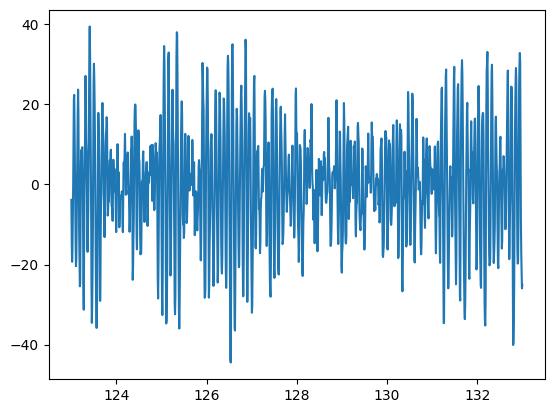

In [10]:
#Generando la segunda de voltaje
ti_b=123 #tiempo de inicio, debe ser número entero
tf_b=133 #tiempo final, debe ser número entero
pt_b=(tf_b-ti_b)*fm#numero de puntos
t1_b=ti_b*fm #nos ayuda a dar la posición de la fila para el tiempo inicial
t2_b=tf_b*fm
t_b=np.linspace(ti_b,tf_b,pt)
v_b = np.array(datosfilt)[t1_b:t2_b,chan]
pt=(tf_b-ti_b)*fm#numero de puntos
t_b=np.linspace(ti_b,tf_b,pt)
v_b = np.array(datosfilt)[t1_b:t2_b,chan]
plt.plot(t_b, v_b)

In [11]:
#Parámetros para definir los rangos de las ondas

win = 2*fm
freqs, psd_a = signal.welch(np.array(datosfilt)[t1_a:t2_a,chan], fm, nperseg=win)
#Delta de 2 a 4
low_delta, high_delta = 2, 4
# Find intersecting values in frequency vector
idx_delta = np.logical_and(freqs >= low_delta, freqs <= high_delta)
#Theta 4-8
low_theta, high_theta = 4, 8
# Find intersecting values in frequency vector
idx_theta = np.logical_and(freqs >= low_theta, freqs <= high_theta)
#Alpha de 8 a 13
low_alpha, high_alpha = 8, 13
# Find intersecting values in frequency vector
idx_alpha = np.logical_and(freqs >= low_alpha, freqs <= high_alpha)
#Beta de 13 a 30
low_beta, high_beta = 13, 30
#Gamma de 30 a 45
low_gamma, high_gamma = 30, 45
# Find intersecting values in frequency vector
idx_gamma = np.logical_and(freqs >= low_gamma, freqs <= high_gamma)
# Find intersecting values in frequency vector
idx_beta = np.logical_and(freqs >= low_beta, freqs <= high_beta)  

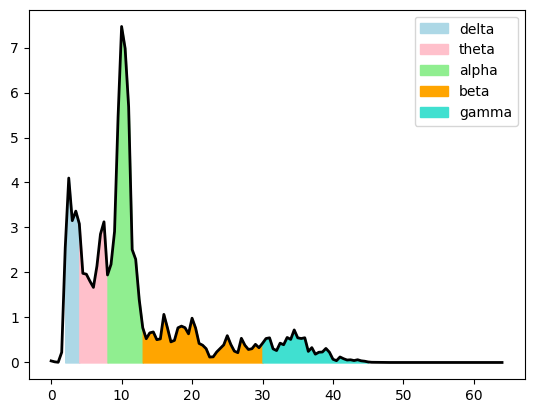

In [12]:
freqs, psd_a = signal.welch(np.array(datosfilt)[t1_a:t2_a,chan], fm, nperseg=win)
plt.plot(freqs, psd_a, color='k', lw=2)
plt.fill_between(freqs, psd_a, where=idx_delta, color='lightblue', label="delta")
plt.fill_between(freqs, psd_a, where=idx_theta, color='pink', label="theta")
plt.fill_between(freqs, psd_a, where=idx_alpha, color='lightgreen', label="alpha")
plt.fill_between(freqs, psd_a, where=idx_beta, color='orange', label="beta")
plt.fill_between(freqs, psd_a, where=idx_gamma, color='turquoise', label="gamma")
plt.legend(loc="upper right")

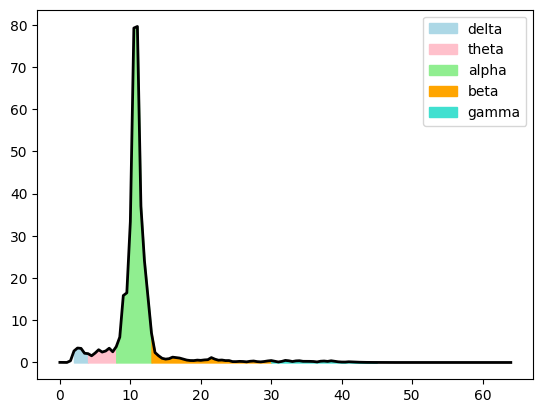

In [13]:
freqs, psd_b = signal.welch(np.array(datosfilt)[t1_b:t2_b,chan], fm, nperseg=win)
plt.plot(freqs, psd_b, color='k', lw=2)
plt.fill_between(freqs, psd_b, where=idx_delta, color='lightblue', label="delta")
plt.fill_between(freqs, psd_b, where=idx_theta, color='pink', label="theta")
plt.fill_between(freqs, psd_b, where=idx_alpha, color='lightgreen', label="alpha")
plt.fill_between(freqs, psd_b, where=idx_beta, color='orange', label="beta")
plt.fill_between(freqs, psd_b, where=idx_gamma, color='turquoise', label="gamma")
plt.legend(loc="upper right")

In [14]:
#Resolución de frecuencia
freq_res = freqs[1] - freqs[0]  # = 1 / 4 = 0.25

# Potencia absoluta utilizando el método de simpson
delta_power_a = simpson(psd_a[idx_delta], dx=freq_res)
theta_power_a = simpson(psd_a[idx_theta], dx=freq_res)
alpha_power_a= simpson(psd_a[idx_alpha], dx=freq_res)
beta_power_a = simpson(psd_a[idx_beta], dx=freq_res)
gamma_power_a = simpson(psd_a[idx_gamma], dx=freq_res)
#Potencia relativa
total_power_a = simpson(psd_a, dx=freq_res)
delta_rel_power_a= delta_power_a/total_power_a
theta_rel_power_a= theta_power_a/total_power_a
alpha_rel_power_a= alpha_power_a/total_power_a
beta_rel_power_a= beta_power_a/total_power_a
gamma_rel_power_a = gamma_power_a/total_power_a

# Método de simpson para el área bajo la curva
delta_power_b = simpson(psd_b[idx_delta], dx=freq_res)
theta_power_b = simpson(psd_b[idx_theta], dx=freq_res)
alpha_power_b= simpson(psd_b[idx_alpha], dx=freq_res)
beta_power_b = simpson(psd_b[idx_beta], dx=freq_res)
gamma_power_b = simpson(psd_b[idx_gamma], dx=freq_res)
# Potencia relativa 
total_power_b = simpson(psd_b, dx=freq_res)
delta_rel_power_b= delta_power_b/total_power_b
theta_rel_power_b= theta_power_b/total_power_b
alpha_rel_power_b= alpha_power_b/total_power_b
beta_rel_power_b= beta_power_b/total_power_b
gamma_rel_power_b = gamma_power_b/total_power_b
print('Relative power de ' +str(ti_a) + ' a '+ str(tf_a) + ' segundos, abierto')
print('Relative delta power: %.3f' % delta_rel_power_a)
print('Relative theta power: %.3f' % theta_rel_power_a)
print('Relative alpha power: %.3f' % alpha_rel_power_a)
print('Relative beta power: %.3f' % beta_rel_power_a)
print('Relative gamma power: %.3f' % gamma_rel_power_a)
print('Relative power de ' +str(ti_b) + ' a '+ str(tf_b) + ' segundos, cerrado')
print('Relative delta power: %.3f' % delta_rel_power_b)
print('Relative theta power: %.3f' % theta_rel_power_b)
print('Relative alpha power: %.3f' % alpha_rel_power_b)
print('Relative beta power: %.3f' % beta_rel_power_b)
print('Relative gamma power: %.3f' % gamma_rel_power_b)


Relative power de 110 a 118 segundos, abierto
Relative delta power: 0.145
Relative theta power: 0.188
Relative alpha power: 0.393
Relative beta power: 0.173
Relative gamma power: 0.088
Relative power de 123 a 133 segundos, cerrado
Relative delta power: 0.030
Relative theta power: 0.055
Relative alpha power: 0.829
Relative beta power: 0.065
Relative gamma power: 0.017


<BarContainer object of 5 artists>

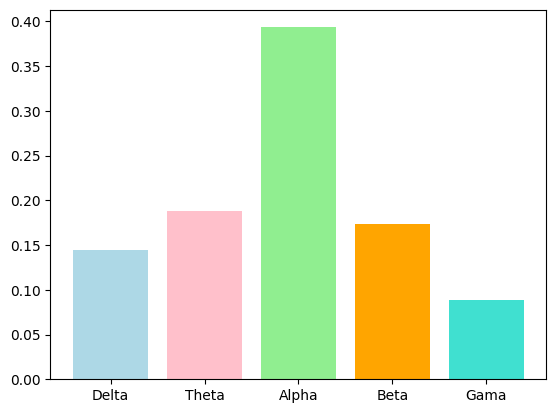

In [15]:
#Condiciones para generar el histograma
categorias = ["Delta", "Theta", "Alpha", "Beta", "Gama"]
valores_a = [delta_rel_power_a, theta_rel_power_a, alpha_rel_power_a, beta_rel_power_a, gamma_rel_power_a]
valores_b= [delta_rel_power_b, theta_rel_power_b, alpha_rel_power_b, beta_rel_power_b, gamma_rel_power_b]
colores = ["lightblue", "pink", "lightgreen", "orange", "turquoise"]
plt.bar(categorias, valores_a, color=colores)

<BarContainer object of 5 artists>

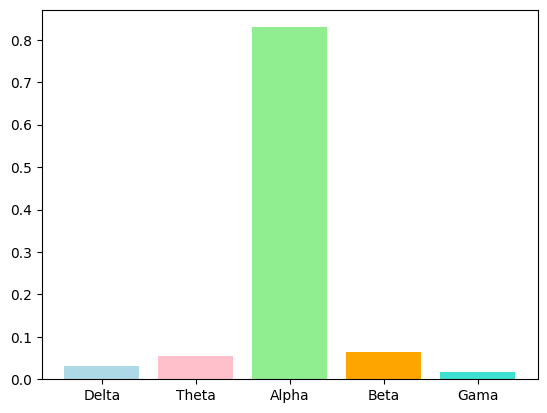

In [16]:
plt.bar(categorias, valores_b, color=colores)

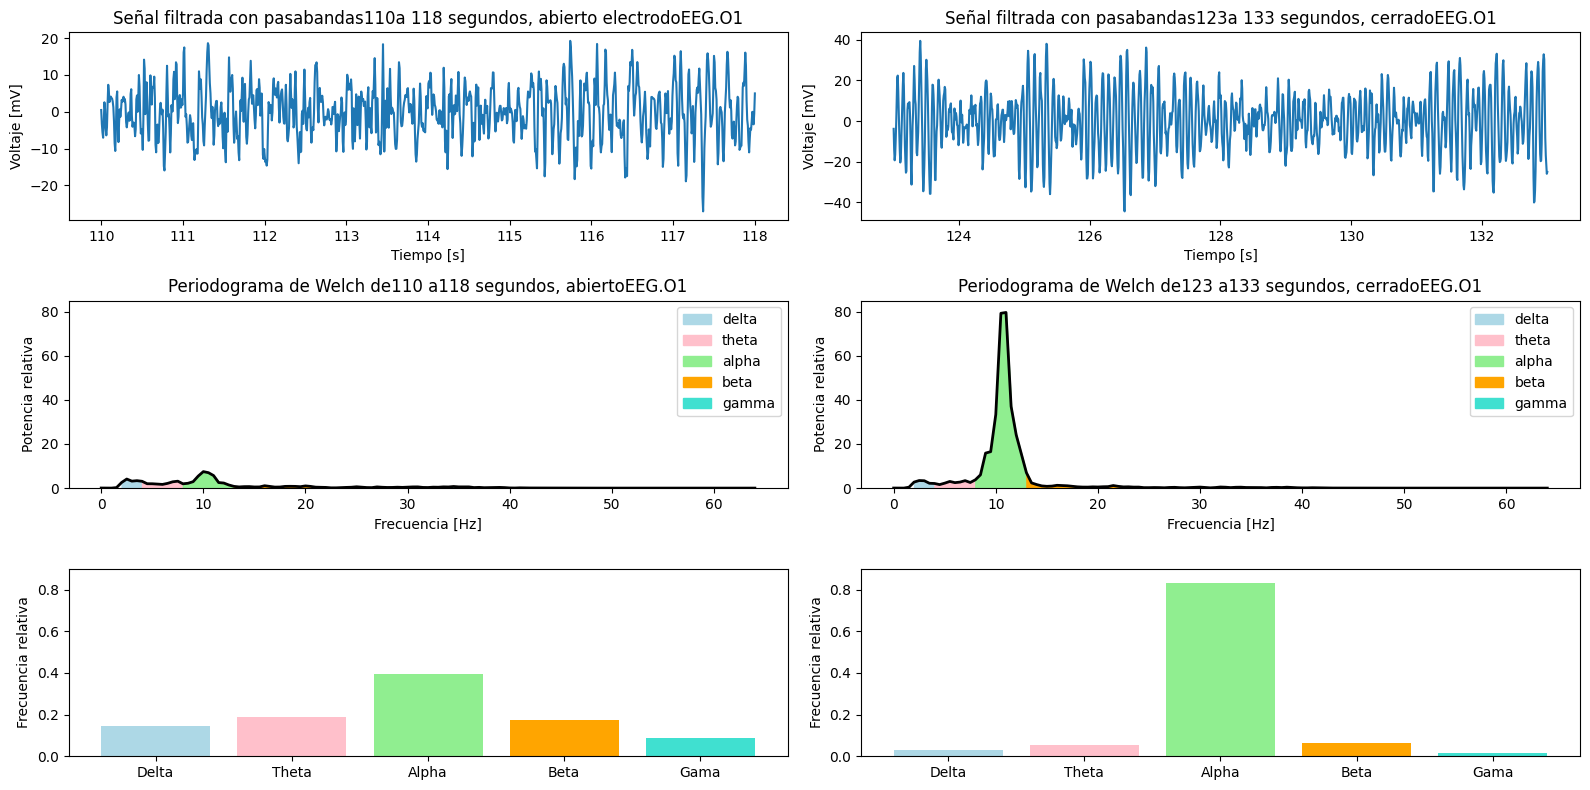

In [17]:

figure, axis = plt.subplots(3, 2, figsize=(16, 8))
axis[1, 0].plot(freqs, psd_a, color='k', lw=2)
axis[1, 0].fill_between(freqs, psd_a, where=idx_delta, color='lightblue', label="delta")
axis[1, 0].fill_between(freqs, psd_a, where=idx_theta, color='pink', label="theta")
axis[1, 0].fill_between(freqs, psd_a, where=idx_alpha, color='lightgreen', label="alpha")
axis[1, 0].fill_between(freqs, psd_a, where=idx_beta, color='orange', label="beta")
axis[1, 0].fill_between(freqs, psd_a, where=idx_gamma, color='turquoise', label="gamma")
axis[1, 0].legend(loc="upper right")
axis[1,0].set_ylim([0,85])
axis[1,0].set_xlabel("Frecuencia [Hz]")
axis[1,0].set_ylabel("Potencia relativa")  
axis[1, 0].set_title("Periodograma de Welch de" +str(ti_a) + ' a'+ str(tf_a) + ' segundos, abierto'+str(nombres[6]))
  
axis[1, 1].plot(freqs, psd_b, color='k', lw=2)
axis[1, 1].fill_between(freqs, psd_b, where=idx_delta, color='lightblue', label="delta")
axis[1, 1].fill_between(freqs, psd_b, where=idx_theta, color='pink', label="theta")
axis[1, 1].fill_between(freqs, psd_b, where=idx_alpha, color='lightgreen', label="alpha")
axis[1, 1].fill_between(freqs, psd_b, where=idx_beta, color='orange', label="beta")
axis[1, 1].fill_between(freqs, psd_b, where=idx_gamma, color='turquoise', label="gamma")
axis[1, 1].legend(loc="upper right")
axis[1,1].set_ylim([0,85])
axis[1,1].set_xlabel("Frecuencia [Hz]")
axis[1, 1].set_title("Periodograma de Welch de" +str(ti_b) + ' a'+ str(tf_b) + ' segundos, cerrado'+str(nombres[6]))
axis[1,1].set_ylabel("Potencia relativa")  

axis[0, 0].plot(t_a,v_a)
axis[0, 0].set_title("Señal filtrada con pasabandas" + str(ti_a) + 'a ' + str(tf_a)+ ' segundos, abierto electrodo'
                    +str(nombres[6]))
axis[0,0].set_ylabel("Voltaje [mV]")  
axis[0,0].set_xlabel("Tiempo [s]")  
axis[0, 1].plot(t_b,v_b)
axis[0, 1].set_title("Señal filtrada con pasabandas" + str(ti_b) + 'a ' + str(tf_b)+ ' segundos, cerrado'
                     +str(nombres[6]))
axis[0,1].set_ylabel("Voltaje [mV]")  
axis[0,1].set_xlabel("Tiempo [s]")  
axis[2,0].bar(categorias, valores_a, color=colores)
axis[2,0].set_ylim([0,0.9])
axis[2,0].set_ylabel("Frecuencia relativa")
axis[2,1].bar(categorias, valores_b, color=colores)
axis[2,1].set_ylim([0,0.9])
axis[2,1].set_ylabel("Frecuencia relativa")
figure.tight_layout()
plt.show()

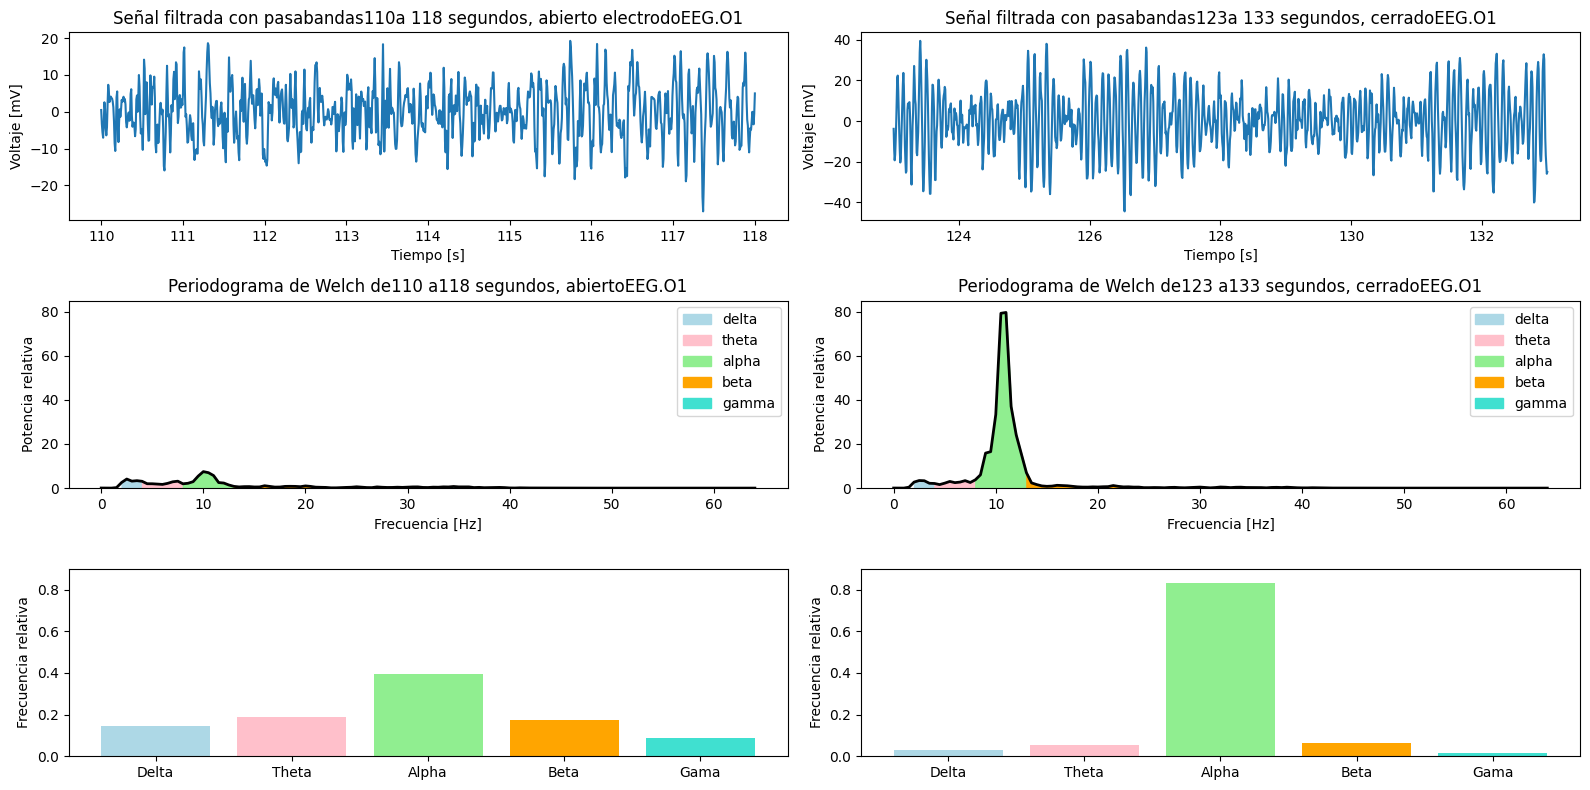

In [17]:

figure, axis = plt.subplots(3, 2, figsize=(16, 8))
axis[1, 0].plot(freqs, psd_a, color='k', lw=2)
axis[1, 0].fill_between(freqs, psd_a, where=idx_delta, color='lightblue', label="delta")
axis[1, 0].fill_between(freqs, psd_a, where=idx_theta, color='pink', label="theta")
axis[1, 0].fill_between(freqs, psd_a, where=idx_alpha, color='lightgreen', label="alpha")
axis[1, 0].fill_between(freqs, psd_a, where=idx_beta, color='orange', label="beta")
axis[1, 0].fill_between(freqs, psd_a, where=idx_gamma, color='turquoise', label="gamma")
axis[1, 0].legend(loc="upper right")
axis[1,0].set_ylim([0,85])
axis[1,0].set_xlabel("Frecuencia [Hz]")
axis[1,0].set_ylabel("Potencia relativa")  
axis[1, 0].set_title("Periodograma de Welch de" +str(ti_a) + ' a'+ str(tf_a) + ' segundos, abierto'+str(nombres[6]))
  
axis[1, 1].plot(freqs, psd_b, color='k', lw=2)
axis[1, 1].fill_between(freqs, psd_b, where=idx_delta, color='lightblue', label="delta")
axis[1, 1].fill_between(freqs, psd_b, where=idx_theta, color='pink', label="theta")
axis[1, 1].fill_between(freqs, psd_b, where=idx_alpha, color='lightgreen', label="alpha")
axis[1, 1].fill_between(freqs, psd_b, where=idx_beta, color='orange', label="beta")
axis[1, 1].fill_between(freqs, psd_b, where=idx_gamma, color='turquoise', label="gamma")
axis[1, 1].legend(loc="upper right")
axis[1,1].set_ylim([0,85])
axis[1,1].set_xlabel("Frecuencia [Hz]")
axis[1, 1].set_title("Periodograma de Welch de" +str(ti_b) + ' a'+ str(tf_b) + ' segundos, cerrado'+str(nombres[6]))
axis[1,1].set_ylabel("Potencia relativa")  

axis[0, 0].plot(t_a,v_a)
axis[0, 0].set_title("Señal filtrada con pasabandas" + str(ti_a) + 'a ' + str(tf_a)+ ' segundos, abierto electrodo'
                    +str(nombres[6]))
axis[0,0].set_ylabel("Voltaje [mV]")  
axis[0,0].set_xlabel("Tiempo [s]")  
axis[0, 1].plot(t_b,v_b)
axis[0, 1].set_title("Señal filtrada con pasabandas" + str(ti_b) + 'a ' + str(tf_b)+ ' segundos, cerrado'
                     +str(nombres[6]))
axis[0,1].set_ylabel("Voltaje [mV]")  
axis[0,1].set_xlabel("Tiempo [s]")  
axis[2,0].bar(categorias, valores_a, color=colores)
axis[2,0].set_ylim([0,0.9])
axis[2,0].set_ylabel("Frecuencia relativa")
axis[2,1].bar(categorias, valores_b, color=colores)
axis[2,1].set_ylim([0,0.9])
axis[2,1].set_ylabel("Frecuencia relativa")
figure.tight_layout()
plt.show()

Explicar método de Simpson para calcular potencia relativa.
* Explica por qué utilizamos el método de Simpson en esta aplicación y en qué consiste. ¿Sobre qué está construida la función?

Es un método de integración numérica donde se dividen los intervalos en función

La idea principal es aproximar la función que se está integrando por una función cuadrática (una parábola) en cada subintervalo del intervalo de integración.
Luego, se calcula el área bajo estas parábolas y se suman para obtener una aproximación del área total bajo la curva original.
Pasos generales

División del intervalo:
El intervalo de integración [a, b] se divide en un número par (n) de subintervalos de igual ancho.
El ancho de cada subintervalo es h = (b - a) / n.
Cálculo de los valores de la función:
Se evalúa la función en los puntos extremos y en los puntos medios de cada subintervalo.
Aplicación de la fórmula:
La fórmula del método de Simpson es:

∫[a, b] f(x) dx ≈ (h / 3) [f(x0) + 4f(x1) + 2f(x2) + 4f(x3) + ... + 2f(xn-2) + 4f(xn-1) + f(xn)]

Donde:

x0 = a
xn = b
x1, x2, ..., xn-1 son los puntos intermedios.
h es el ancho de los subintervalos.
Interpretación:
Como se ve en la formula, se le dan diferentes pesos a los valores de la función. Los valores de los extremos tienen un peso de 1. Los puntos intermedios impares tienen un peso de 4 y los puntos intermedios pares tienen un peso de 2.
Consideraciones

El método de Simpson es generalmente más preciso que la regla del trapecio, especialmente para funciones que son suaves.
Requiere que el número de subintervalos sea par.
Existen variaciones del método, como la regla de Simpson 3/8, que se utiliza cuando el número de subintervalos es impar.


Hacer histogramas para visualizar la distribución de bandas

Text(0.5, 1.0, 'Espectrograma de Signal110a 118 segundos, abierto electrodoEEG.O1')

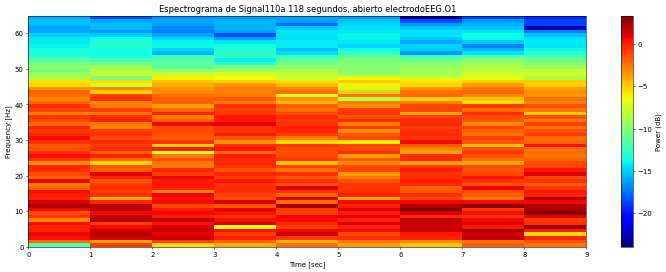

In [18]:
datos_a=np.array(datosfilt)[t1_a:t2_a,6]
f, t, sxx = signal.spectrogram(datos_a,128,nperseg=128,scaling='spectrum')
plt.figure(figsize=(18,6),dpi=50) 
plt.pcolormesh(np.log(sxx),cmap='jet') 
plt.ylabel('Frequency [Hz]') 
plt.xlabel('Time [sec]') 
plt.colorbar(label='Power (dB)') 
plt.title('Espectrograma de Signal'+ str(ti_a) + 'a ' + str(tf_a)+ ' segundos, abierto electrodo'
                    +str(nombres[6])) #plt.ylim(0,500)

Text(0.5, 1.0, 'Espectrograma de Signal123a 133 segundos, cerradoEEG.O1')

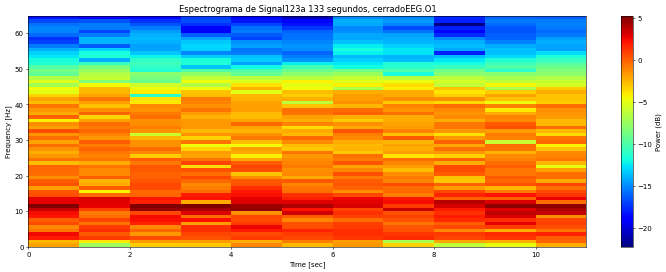

In [19]:
datos_b=np.array(datosfilt)[t1_b:t2_b,6]
f, t, sxx = signal.spectrogram(datos_b,128,nperseg=128,scaling='spectrum')
plt.figure(figsize=(18,6),dpi=50) 
plt.pcolormesh(np.log(sxx),cmap='jet') 
plt.ylabel('Frequency [Hz]') 
plt.xlabel('Time [sec]') 
plt.colorbar(label='Power (dB)') 
plt.title('Espectrograma de Signal'+ str(ti_b) + 'a ' + str(tf_b)+ ' segundos, cerrado'
                     +str(nombres[6])) #plt.ylim(0,500)

* Comparar Espectrograma default de Signal con ejercicio de Bartlett


Hacer la interpretación fisiológica. En ojos abiertos la actividad está más difusa. En ojos cerrados la actividad se concentra alrededor de la banda alfa. 

Tres visualizaciones.

### Picos en PSD:
Hacer un análisis de densidad de Potencia Espectral nos ayuda a identificar en qué bandas de frecuencia se concentra la mayor actividad. Para mejorar la visualización se hizo una separación por bandas.
### Histograma con potencia relativa
Nos encontramos con otra forma de visualizar los datos a partir de hacer una integración numérica para obtener las potencias debajo de la gráfica de Densidad de Potencia Espectral. De esta forma, a parte de cuantificar la proporción de actividad que corresponde a cada banda podemos...

### Espectrograma comparando actividad de ojos abiertos y ojos cerrados.
Hacer la interpretación fisiológica. En ojos abiertos la actividad está más difusa. En ojos cerrados la actividad se concentra alrededor de la banda alfa. 

Cuando tenemos actividad en ojos abiertos, la actividad se difunde por un espectro ancho de frecuencias. En cambio cuando teneos actividad en alfa observamos un patrón de coloración más oscuro en la banda alfa.


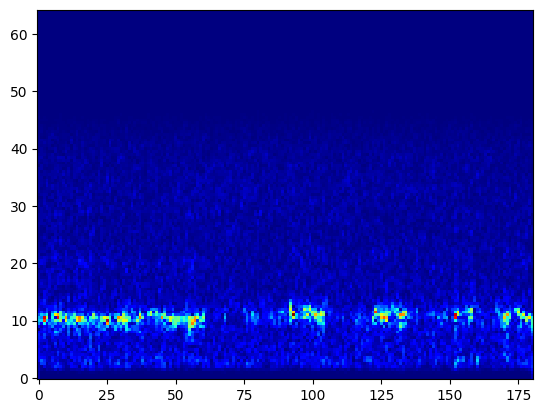

In [20]:
samples = np.array(datosfilt)[t1:t2,6]
f, t, Zxx = signal.stft(samples, fs=128)
plt.pcolormesh(t, f, np.abs(Zxx), cmap=plt.cm.jet)

## Bibliografía
* Kong, Q., Siauw, T., & Bayen, A. (2020). Python programming and numerical methods: A guide for engineers and scientists. Academic Press.
* Vallat, R., Meunier, D., Nicolas, A., & Ruby, P. (2019). Hard to wake up? The cerebral correlates of sleep inertia assessed using combined behavioral, EEG and fMRI measures. NeuroImage, 184, 266-278.